# Analysis of an image

First some config and loaing libraries:

In [23]:
#with interactivity but a little slower
%matplotlib notebook

# without interactivity
# %matplotlib inline

%config IPCompleter.greedy=True

In [24]:
import numpy as np 

import cv2

import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
import matplotlib as mpl

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Now, reading tiff file, and printing size of an image

In [25]:
img = cv2.imread('/home/magt/Repozytoria/GitHub/MyJupyter/img/5_03T.tif',0)

print("Image dims are: ",img.shape)

Image dims are:  (1024, 1024)


Showing image to read coordinates to crop region

<IPython.core.display.Javascript object>


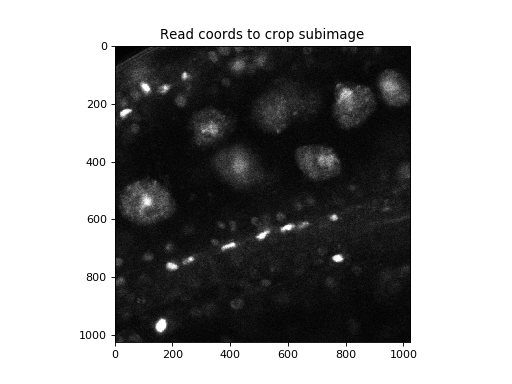

In [26]:
# allows interactivity with image ??? TODO - check this out.
%matplotlib nbagg

# line below allows to display image in fixed dpi (when need for printing/submission)
#plt.rcParams['figure.dpi'] = 100 # default for me was 75

# line below allows display image in a certain size
# mpl.rcParams['figure.figsize'] = (8,6)

fig, ax = plt.subplots()    
myax_01 = ax.imshow(img, cmap = 'gray', interpolation='nearest')

#setting title
ax.set_title('Read coords to crop subimage')

# displays coords pointed by the mouse. To have detailed coords - remove int() method
ax.format_coord = lambda x,y : "x=%g y=%g" % (x, y)

plt.show()

Now, write the coordinates (read above) of the region to be cropped:

In [35]:
#upper-left-coords (y-ki od-do)?
x1, y1 = 200, 350

#bottom right coords
x2, y2 = 260, 430

<IPython.core.display.Javascript object>


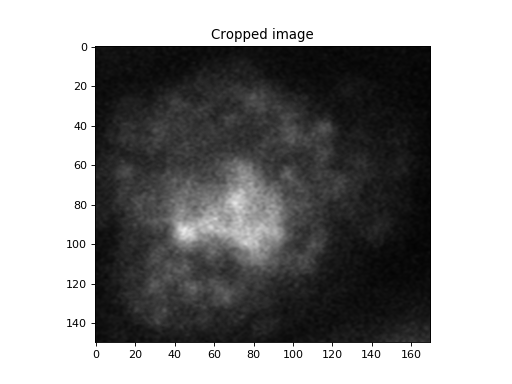

In [36]:
# mpl.rcParams['figure.figsize'] = (6,4)

cropped_image = img[x1:y1, x2:y2]

fig, ax = plt.subplots()    
myax_2 = ax.imshow(cropped_image,cmap = 'gray', interpolation='bicubic')

#setting title
ax.set_title('Cropped image')

plt.show()

# copy of cropped image for further processing
c_img=cropped_image

In [ ]:
# uncommentif you want to save cropped image 
#cv2.imwrite('/home/magt/Repozytoria/GitHub/MyJupyter/img/edgesByCanny.tif',c_img)

Function to detect edges by Canny algorithm

In [54]:
def showEdgesByCanny(img, thresholds, blur, blurType):
    """ Function called by interact """
    if blur:
        if blurType == 'Median':
            img = cv2.medianBlur(img, 5)
        elif blurType == 'Guassian':
            img = cv2.GaussianBlur(img, (5, 5), 0)
        elif blurType == 'Bilateral': 
            img = cv2.bilateralFilter(img, 9, 75, 75)
            
    thresh1, thresh2 = thresholds
    
    edges_by_canny = cv2.Canny(cropped_image, thresh1, thresh2)
    return(edges_by_canny)


Creating widget to interactively tune parameters for Canny

In [49]:
# Creating widget
rangeSlider = widgets.IntRangeSlider(
    value = [50, 300],
    min = 0,
    max = 500,
    step = 2,
    description = 'Tune Canny params',
    continuous_update = False
)

<IPython.core.display.Javascript object>


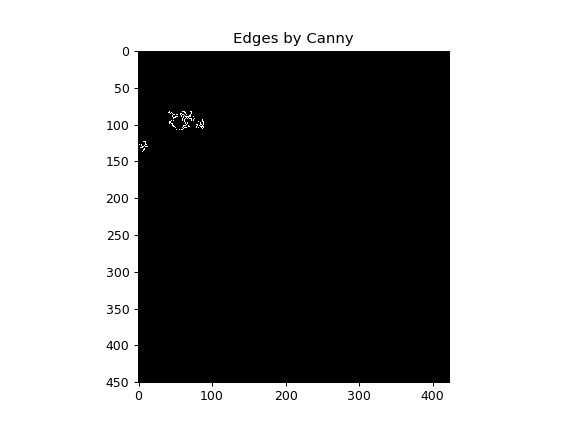

In [48]:
fig,ax = plt.subplots()    
myax_4 = ax.imshow(c_img,cmap = 'gray')
plt.show(c_img)

In [50]:
# Using interact from ipywidgets
# You have to specify the value of every parameter
# or define the specific widget (rangeSlider)
# Other parameters must be fixed
interact(showEdgesByCanny,
         img = fixed(c_img),
         thresholds = rangeSlider,
         blur = True,
         blurType = ['Median', 'Guassian', 'Bilateral'])

ax.set_title('Edges by Canny')
plt.show()

interactive(children=(IntRangeSlider(value=(50, 300), continuous_update=False, description='Tune Canny params'…

To save img of edges

In [52]:
# cv2.imwrite('/home/magt/Repozytoria/GitHub/MyJupyter/img/edgesByCanny.tif',c_img)


True

My code without widgets

In [ ]:
# Canny(img, upper,lower)
canny_edges = cv2.Canny(cropped_image, 200, 100)

mpl.rcParams['figure.figsize'] = (9,7)

fig,ax = plt.subplots()    
myax4 = ax.imshow(canny_edges,cmap = 'gray')

#setting title
ax.set_title('Cropped image with canny edges detected')

In [ ]:
mpl.rcParams['figure.figsize'] = (8,6)

lpl_edges = cv2.Laplacian(cropped_image,cv2.CV_64F)

fig,ax = plt.subplots()    
myax5 = ax.imshow(lpl_edges,cmap = 'gray')

#setting title
ax.set_title('Cropped image with laplace')

<IPython.core.display.Javascript object>


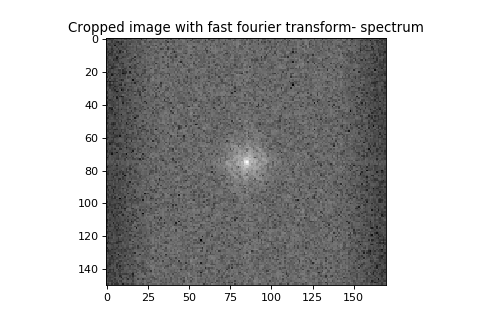

<function matplotlib.pyplot.show(*args, **kw)>

In [37]:
mpl.rcParams['figure.figsize'] = (6,4)


f = np.fft.fft2(cropped_image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fig1,ax = plt.subplots()

myax5 = ax.imshow(magnitude_spectrum, cmap='gray')
ax.set_title('Cropped image with fast fourier transform- spectrum')

plt.show


# plt.subplot(121),plt.imshow(img, cmap = 'gray')
# plt.title('Input Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
# plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

In [66]:
fimg = np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(cropped_image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(np.log(np.abs(fshift)), cmap = 'gray')
plt.title('fourier'), plt.xticks([]), plt.yticks([])

(Text(0.5,1,'fourier'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

In [30]:
cv2.imwrite('/home/magt/Repozytoria/GitHub/MyJupyter/img/fourier.png', np.log(np.abs(fimg)))

True